In [272]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [273]:
N = 1000
name = []
first_name = ["Владмир ", "Олег ", "Денис ", "Вадим ", "Евгений ", "Виктор ", "Валерий ", "Андрей ", "Дмитрий ", "Артур ", "Николай ", "Артём ", "Михаил ", "Вячеслав ", "Никита ", "Аркадий ", "Григорий ", "Владислав ", "Александр "]
last_name=["Иванов", "Кирейчук", "Астахов", "Герасимчук", "Краснов", "Стоев", "Камышев", "Троцкий", "Кировский", "Смирнов", "Гаврилов", "Комов", "Новиков", "Токарев", "Климов", "Кремнев", "Клевцов", "Дворовой", "Трубин", "Кожомов"]
for i in range(N):
    name.append(first_name[random.randint(0, 9)]+last_name[random.randint(0, 9)])
name = pd.DataFrame(name)
name.columns = ['name']
name

,name
0,Дмитрий Смирнов
1,Дмитрий Астахов
2,Вадим Кирейчук
3,Дмитрий Кирейчук
4,Денис Кирейчук
...,...
995,Валерий Иванов
996,Вадим Камышев
997,Вадим Камышев
998,Артур Кировский


In [274]:
N = 1000

message_meta = {"Monday_total":[0 for _ in range(N)], "Tuesday_total":[0 for _ in range(N)], "Wednesday_total":[0 for _ in range(N)], "Thursday_total":[0 for _ in range(N)], "Friday_total":[0 for _ in range(N)],"Total_message":[0 for _ in range(N)]}
for i in range(N):
    for j in range(5):
        message_meta[list(message_meta.keys())[j]][i] = round(np.random.uniform(0,60))
    message_meta['Total_message'][i] = sum([message_meta[list(message_meta.keys())[j]][i] for j in range(5)])
message_meta = pd.DataFrame(message_meta)
# sns.histplot(message_meta)
message_meta

,Monday_total,Tuesday_total,Wednesday_total,Thursday_total,Friday_total,Total_message
0,46,45,25,13,45,174
1,20,37,29,43,60,189
2,46,31,19,50,49,195
3,23,23,36,56,40,178
4,28,35,14,44,17,138
...,...,...,...,...,...,...
995,59,43,21,10,33,166
996,49,42,2,40,5,138
997,3,13,34,34,2,86
998,2,44,16,13,36,111


<Axes: ylabel='10'>

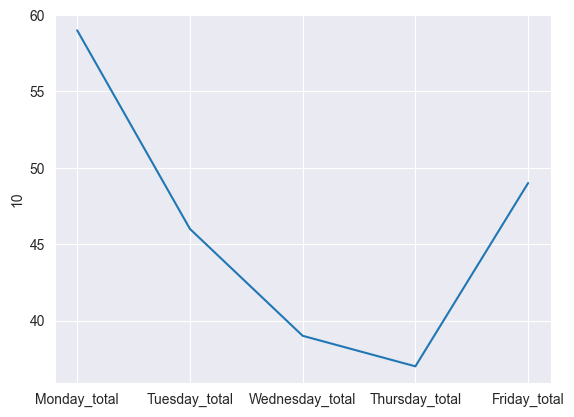

In [275]:
sns.lineplot(message_meta.drop(["Total_message"], axis=1).loc[10])

<Axes: xlabel='Total_message', ylabel='Count'>

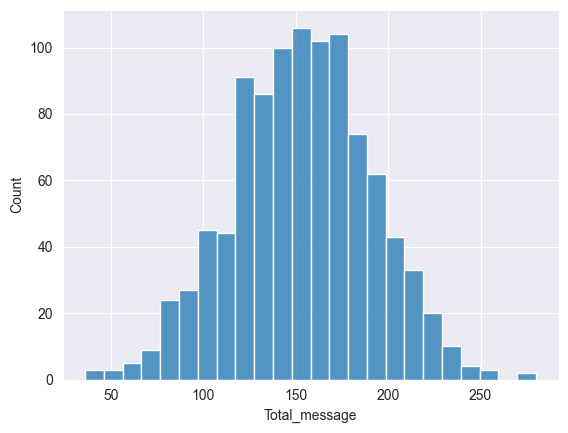

In [276]:
sns.histplot(message_meta["Total_message"])

In [277]:
target_words = ["fix bug","fix bugs","fix errors",'fix error',"review this"]
good_words = ['create', 'update', 'realization', 'add', 'connect'] # example create something and etc
all_words = target_words + good_words
commit_meta = {"Commit word": ['' for _ in range(N)]}
for i in range(N):
    commit_meta["Commit word"][i] = np.random.choice(all_words, np.random.randint(6), replace=True)
commit_meta = pd.DataFrame(commit_meta)
commit_meta

,Commit word
0,"[fix bugs, add, update, update, create]"
1,"[update, fix bugs, connect, add, update]"
2,"[add, fix errors]"
3,[realization]
4,"[fix bugs, connect]"
...,...
995,"[fix bug, realization, connect, fix bugs, conn..."
996,"[fix bugs, fix bug]"
997,[fix errors]
998,"[fix errors, fix bug, fix errors]"


In [278]:
task_meta = {"1 plus":[0 for _ in range(N)], "1 minus":[0 for _ in range(N)]}
for i in range(N):
    task_meta["1 plus"][i] = np.random.randint(4) + 1
    task_meta["1 minus"][i] = np.random.randint(3) + 1
task_meta = pd.DataFrame(task_meta)
task_meta

,1 plus,1 minus
0,4,3
1,4,1
2,2,2
3,3,2
4,4,3
...,...,...
995,4,3
996,3,1
997,2,1
998,1,1


<Axes: ylabel='10'>

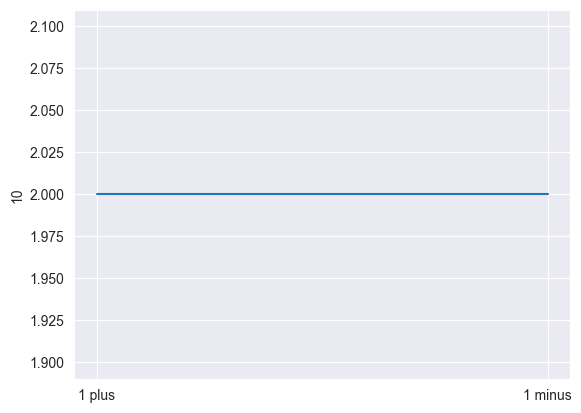

In [279]:
sns.lineplot(task_meta.loc[10])

In [280]:
time_meta = {"Time of activity": np.random.randn(N)+8} # in hours
time_meta = pd.DataFrame(time_meta)
time_meta

,Time of activity
0,7.515621
1,7.269174
2,8.819705
3,7.278167
4,8.951503
...,...
995,8.094216
996,7.117207
997,8.116088
998,7.707564


<Axes: ylabel='Count'>

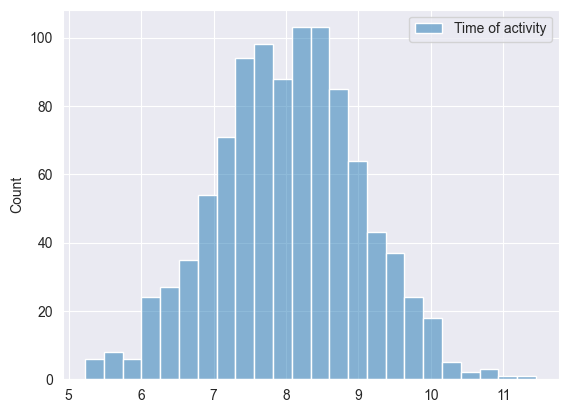

In [281]:
sns.histplot(time_meta)

In [282]:
data = name.join(message_meta).join(task_meta).join(time_meta).join(commit_meta)
data

,name,Monday_total,Tuesday_total,Wednesday_total,Thursday_total,Friday_total,Total_message,1 plus,1 minus,Time of activity,Commit word
0,Дмитрий Смирнов,46,45,25,13,45,174,4,3,7.515621,"[fix bugs, add, update, update, create]"
1,Дмитрий Астахов,20,37,29,43,60,189,4,1,7.269174,"[update, fix bugs, connect, add, update]"
2,Вадим Кирейчук,46,31,19,50,49,195,2,2,8.819705,"[add, fix errors]"
3,Дмитрий Кирейчук,23,23,36,56,40,178,3,2,7.278167,[realization]
4,Денис Кирейчук,28,35,14,44,17,138,4,3,8.951503,"[fix bugs, connect]"
...,...,...,...,...,...,...,...,...,...,...,...
995,Валерий Иванов,59,43,21,10,33,166,4,3,8.094216,"[fix bug, realization, connect, fix bugs, conn..."
996,Вадим Камышев,49,42,2,40,5,138,3,1,7.117207,"[fix bugs, fix bug]"
997,Вадим Камышев,3,13,34,34,2,86,2,1,8.116088,[fix errors]
998,Артур Кировский,2,44,16,13,36,111,1,1,7.707564,"[fix errors, fix bug, fix errors]"


In [299]:
k = 0
tmp = {}
for name, values in data['Total_message'].iteritems():
	if abs(values - data['Total_message'].mean()) > data['Total_message'].std( ):
		k += 1
		tmp[name]=k
		k = 0
	else: tmp[name]=k
cols = ['1 plus', '1 minus']
data['sum_stats'] = data[cols]. sum (axis= 1 )
for name, values in data['sum_stats'].iteritems():
	if abs(values - data['sum_stats'].mean()) > data['sum_stats'].std( ):
		k += 1
		tmp[name]+=k
		k = 0
	else: tmp[name]+=k
        
for name, values in data['Time of activity'].iteritems():
	if abs(values - data['Time of activity'].mean()) > data['Time of activity'].std( ):
		k += 1
		tmp[name]+=k
		k = 0
	else: tmp[name]+=k
        
for name, values in data['Commit word'].iteritems():
    for val in values:
        if val.lower() in target_words:
            k += 1
            tmp[name] += k
            k = 0
        else: tmp[name]+=k
tmp

C:\Users\Denis\AppData\Local\Temp\ipykernel_7044\4106595225.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in data['Total_message'].iteritems():
C:\Users\Denis\AppData\Local\Temp\ipykernel_7044\4106595225.py:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in data['sum_stats'].iteritems():
C:\Users\Denis\AppData\Local\Temp\ipykernel_7044\4106595225.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in data['Time of activity'].iteritems():
C:\Users\Denis\AppData\Local\Temp\ipykernel_7044\4106595225.py:25: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in data['Commit word'].iteritems():


{0: 2,
 1: 1,
 2: 2,
 3: 0,
 4: 2,
 5: 6,
 6: 2,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 4,
 12: 2,
 13: 1,
 14: 3,
 15: 0,
 16: 1,
 17: 2,
 18: 1,
 19: 2,
 20: 3,
 21: 5,
 22: 4,
 23: 3,
 24: 4,
 25: 3,
 26: 2,
 27: 2,
 28: 4,
 29: 4,
 30: 2,
 31: 4,
 32: 4,
 33: 0,
 34: 3,
 35: 3,
 36: 3,
 37: 3,
 38: 3,
 39: 3,
 40: 2,
 41: 0,
 42: 3,
 43: 3,
 44: 3,
 45: 2,
 46: 1,
 47: 2,
 48: 3,
 49: 1,
 50: 2,
 51: 2,
 52: 5,
 53: 4,
 54: 1,
 55: 3,
 56: 3,
 57: 4,
 58: 4,
 59: 4,
 60: 1,
 61: 0,
 62: 2,
 63: 1,
 64: 5,
 65: 4,
 66: 1,
 67: 2,
 68: 2,
 69: 1,
 70: 4,
 71: 1,
 72: 0,
 73: 0,
 74: 2,
 75: 2,
 76: 1,
 77: 2,
 78: 1,
 79: 1,
 80: 0,
 81: 3,
 82: 5,
 83: 7,
 84: 2,
 85: 1,
 86: 1,
 87: 2,
 88: 2,
 89: 3,
 90: 0,
 91: 4,
 92: 2,
 93: 2,
 94: 1,
 95: 2,
 96: 2,
 97: 2,
 98: 3,
 99: 1,
 100: 2,
 101: 0,
 102: 2,
 103: 5,
 104: 0,
 105: 0,
 106: 6,
 107: 3,
 108: 2,
 109: 2,
 110: 4,
 111: 3,
 112: 2,
 113: 3,
 114: 1,
 115: 3,
 116: 3,
 117: 3,
 118: 2,
 119: 3,
 120: 1,
 121: 3,
 122: 3,
 12

In [300]:
name_burnout = []
for key in tmp:
    if tmp[key]>=3:
        name_burnout.append(data.at[key, 'name'])
name_burnout

['Дмитрий Герасимчук',
 'Вадим Астахов',
 'Олег Троцкий',
 'Евгений Троцкий',
 'Андрей Иванов',
 'Олег Кирейчук',
 'Андрей Камышев',
 'Валерий Астахов',
 'Вадим Камышев',
 'Андрей Стоев',
 'Вадим Герасимчук',
 'Виктор Иванов',
 'Денис Стоев',
 'Валерий Герасимчук',
 'Олег Камышев',
 'Дмитрий Кировский',
 'Артур Кирейчук',
 'Евгений Стоев',
 'Вадим Смирнов',
 'Денис Стоев',
 'Денис Иванов',
 'Валерий Кировский',
 'Валерий Камышев',
 'Дмитрий Иванов',
 'Валерий Троцкий',
 'Валерий Камышев',
 'Олег Смирнов',
 'Андрей Герасимчук',
 'Олег Троцкий',
 'Дмитрий Кировский',
 'Олег Смирнов',
 'Валерий Смирнов',
 'Виктор Астахов',
 'Денис Краснов',
 'Валерий Кирейчук',
 'Евгений Иванов',
 'Артур Краснов',
 'Андрей Троцкий',
 'Артур Герасимчук',
 'Артур Камышев',
 'Дмитрий Троцкий',
 'Олег Троцкий',
 'Дмитрий Камышев',
 'Валерий Кировский',
 'Евгений Иванов',
 'Евгений Астахов',
 'Валерий Камышев',
 'Олег Троцкий',
 'Дмитрий Кирейчук',
 'Владмир Астахов',
 'Дмитрий Смирнов',
 'Артур Астахов',
 'Ви

In [288]:
data.to_csv("burnout.csv",index=False)